<a href="https://colab.research.google.com/github/raditya-aisy/All_about_Data_2/blob/main/Mini_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Distribution of Classes Across Datasets:
Dataset kelas  Counts
   CPA1     A     100
   CPA1     E     100
   CPA2     B     100
   CPA2     E     100
   CPA3     A     200
   CPA3     E     100
   CPB1     A     100
   CPB1     C     100
   CPB2     A     100
   CPB2     D     100
   CPB3     B     100
   CPB3     C     100
   CPB4     B     100
   CPB4     D     100
   CPB5     A     200
   CPB5     C     100
   CPB6     A     200
   CPB6     D     100
   CPB7     A     200
   CPB7     C     200


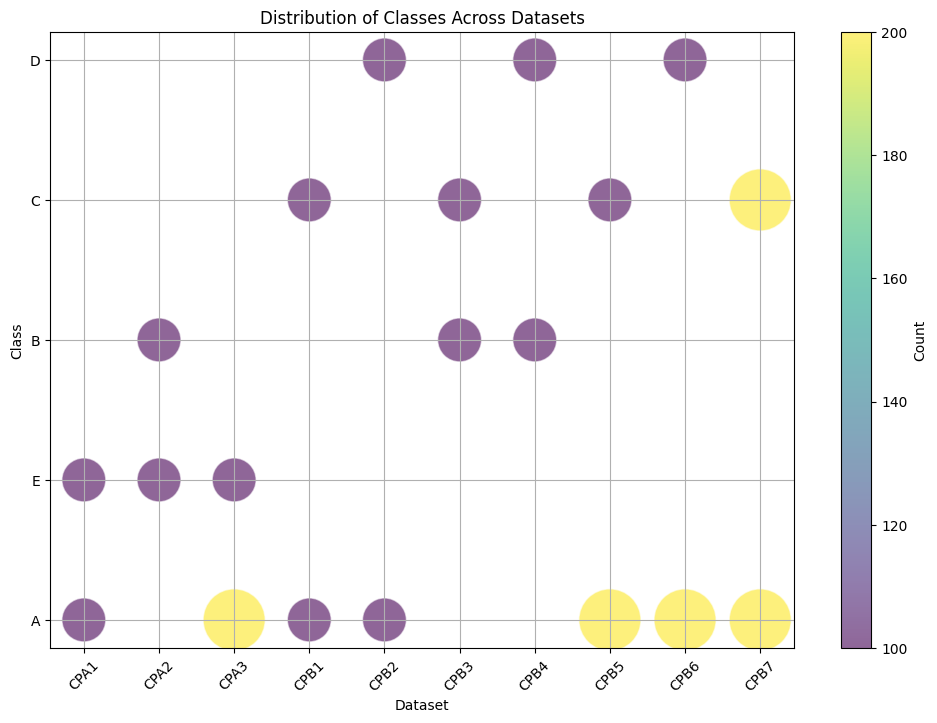

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# List of dataset paths
dataset_paths = {
    'CPA1': '/content/CPA1.xlsx',
    'CPA2': '/content/CPA2.xlsx',
    'CPA3': '/content/CPA3.xlsx',
    'CPB1': '/content/CPB1.xlsx',
    'CPB2': '/content/CPB2.xlsx',
    'CPB3': '/content/CPB3.xlsx',
    'CPB4': '/content/CPB4.xlsx',
    'CPB5': '/content/CPB5.xlsx',
    'CPB6': '/content/CPB6.xlsx',
    'CPB7': '/content/CPB7.xlsx'
}

# DataFrame to store results
all_data = pd.DataFrame()

# Load and concatenate all datasets
for name, path in dataset_paths.items():
    temp_data = pd.read_excel(path)
    temp_data['Dataset'] = name  # Add a column to identify the dataset
    all_data = pd.concat([all_data, temp_data], ignore_index=True)

# Calculate counts
class_counts = all_data.groupby(['Dataset', 'kelas']).size().reset_index(name='Counts')

# Print the results in a tabular format
print("Distribution of Classes Across Datasets:")
print(class_counts.to_string(index=False))

# Optional: Plotting
plt.figure(figsize=(12, 8))
scatter = plt.scatter(x=class_counts['Dataset'], y=class_counts['kelas'],
                      s=class_counts['Counts']*10,  # Multiply by 10 to scale up point sizes for visibility
                      c=class_counts['Counts'], cmap='viridis', alpha=0.6, edgecolors='w')
plt.colorbar(scatter, label='Count')
plt.xlabel('Dataset')
plt.ylabel('Class')
plt.title('Distribution of Classes Across Datasets')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


**10-fold Cross-Validation**

Langkah-langkah:

* **Load Data** : Untuk setiap dataset CPA dan CPB (NIM GENAP).
* **Preprocessing** : Standarisasi fitur menggunakan StandardScaler.
* **Setup Scenario** (10-fold Cross-Validation) : Menggunakan StratifiedKFold untuk memastikan bahwa setiap fold memiliki proporsi kelas yang sama.
* **Classification** (Classifier) : Aplikasikan SVM atau KNN pada data.
* **Evaluate Performance** : Hitung Sensitivity, Specificity, Accuracy, dan F1-Score.
* **Display Results** : Tampilkan hasil untuk setiap dataset.


  Dataset  Accuracy  F1-Score  Sensitivity  Specificity
CPA1.xlsx  0.770000  0.769424         0.82        0.720
CPA2.xlsx  0.755000  0.754700         0.72        0.790
CPA3.xlsx  0.776667  0.771649         0.59        0.870
CPB1.xlsx  0.870000  0.869792         0.91        0.830
CPB2.xlsx  0.860000  0.859311         0.93        0.790
CPB3.xlsx  0.895000  0.894681         0.95        0.840
CPB4.xlsx  0.895000  0.894554         0.96        0.830
CPB5.xlsx  0.866667  0.869393         0.91        0.845
CPB6.xlsx  0.860000  0.863032         0.91        0.835
CPB7.xlsx  0.875000  0.874621         0.93        0.820


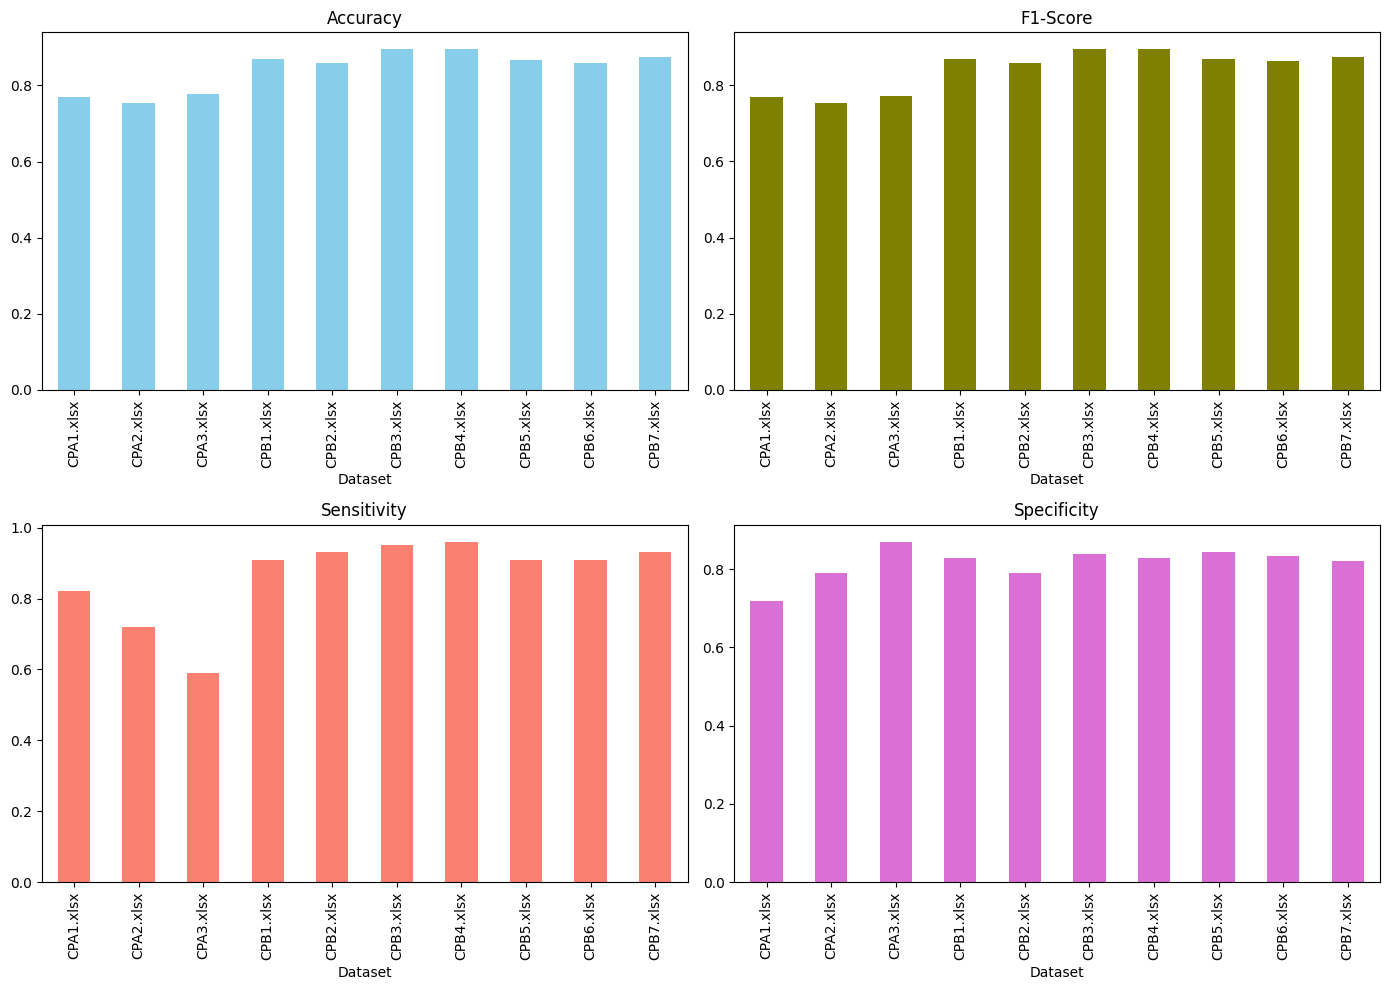

In [14]:
#SVM

import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
import os

# List of dataset paths
dataset_paths = [
    '/content/CPA1.xlsx',
    '/content/CPA2.xlsx',
    '/content/CPA3.xlsx',

    '/content/CPB1.xlsx',
    '/content/CPB2.xlsx',
    '/content/CPB3.xlsx',
    '/content/CPB4.xlsx',
    '/content/CPB5.xlsx',
    '/content/CPB6.xlsx',
    '/content/CPB7.xlsx',
]

# Fungsi untuk menghitung Sensitivity dan Specificity
def calculate_sensitivity_specificity(cm):
    sensitivity = cm[1, 1] / (cm[1, 1] + cm[1, 0]) if cm.shape[0] > 1 else float('nan')
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1]) if cm.shape[0] > 1 else float('nan')
    return sensitivity, specificity

# Menyiapkan 10-fold cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# DataFrame untuk menyimpan hasil
results_df = pd.DataFrame()

# Proses setiap dataset
for file_path in dataset_paths:
    data = pd.read_excel(file_path)
    X = data.drop('kelas', axis=1)
    y = data['kelas']

    # Standarisasi fitur
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Setup SVM classifier
    svm_model = SVC(random_state=42)

    # Mendapatkan prediksi dari 10-fold CV
    predictions = cross_val_predict(svm_model, X_scaled, y, cv=cv)

    # Menghitung confusion matrix
    cm = confusion_matrix(y, predictions)

    # Menghitung metrik evaluasi
    accuracy = accuracy_score(y, predictions)
    f1 = f1_score(y, predictions, average='weighted')
    sensitivity, specificity = calculate_sensitivity_specificity(cm)

    # Menyimpan hasil ke DataFrame
    results_df = results_df.concat({
        "Dataset": file_path.split('/')[-1],
        "Accuracy": accuracy,
        "F1-Score": f1,
        "Sensitivity": sensitivity,
        "Specificity": specificity
    }, ignore_index=True)

# Menampilkan hasil dalam bentuk tabel yang rapi
print(results_df.to_string(index=False))

# Save results to a CSV file
results_file = '/content/results_1.csv'
results_df.to_csv(results_file, index=False)

# Grafik perbandingan untuk setiap metrik
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
results_df.set_index('Dataset', inplace=True)
results_df['Accuracy'].plot(kind='bar', ax=axes[0, 0], color='skyblue', title='Accuracy')
results_df['F1-Score'].plot(kind='bar', ax=axes[0, 1], color='olive', title='F1-Score')
results_df['Sensitivity'].plot(kind='bar', ax=axes[1, 0], color='salmon', title='Sensitivity')
results_df['Specificity'].plot(kind='bar', ax=axes[1, 1], color='orchid', title='Specificity')
plt.tight_layout()
plt.show()


  Dataset  Accuracy  F1-Score  Sensitivity  Specificity
CPA1.xlsx  0.745000  0.744943        0.730        0.760
CPA2.xlsx  0.735000  0.733501        0.660        0.810
CPA3.xlsx  0.790000  0.780252        0.550        0.910
CPB1.xlsx  0.860000  0.860000        0.860        0.860
CPB2.xlsx  0.860000  0.859649        0.910        0.810
CPB3.xlsx  0.880000  0.879808        0.920        0.840
CPB4.xlsx  0.895000  0.894406        0.970        0.820
CPB5.xlsx  0.843333  0.843899        0.780        0.875
CPB6.xlsx  0.873333  0.874959        0.870        0.875
CPB7.xlsx  0.865000  0.864946        0.885        0.845


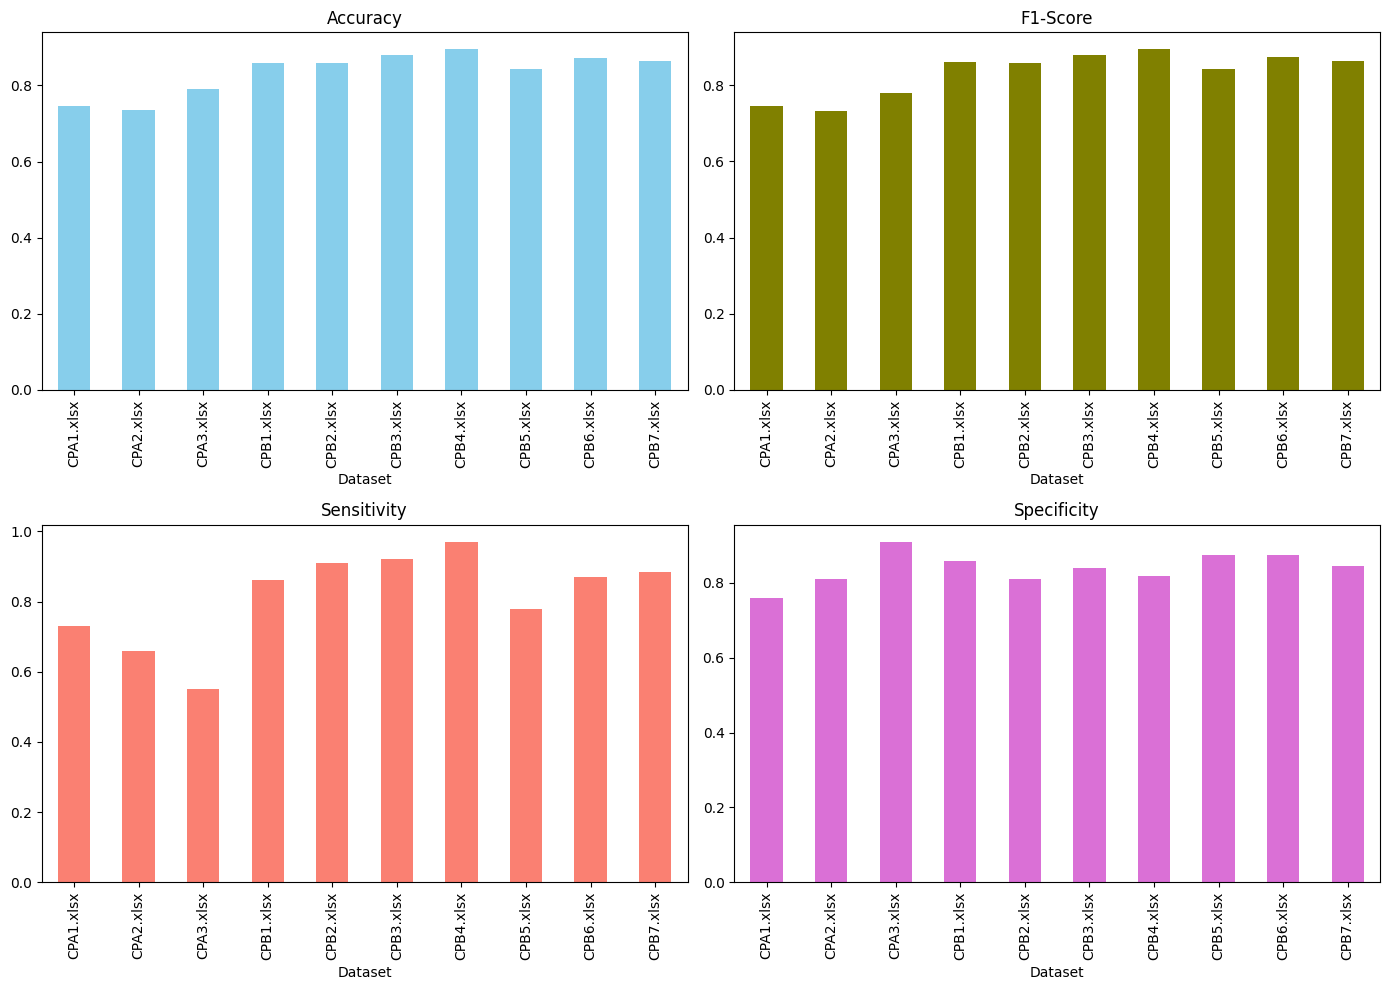

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
import os

# List of dataset paths
dataset_paths = [
    '/content/CPA1.xlsx',
    '/content/CPA2.xlsx',
    '/content/CPA3.xlsx',
    '/content/CPB1.xlsx',
    '/content/CPB2.xlsx',
    '/content/CPB3.xlsx',
    '/content/CPB4.xlsx',
    '/content/CPB5.xlsx',
    '/content/CPB6.xlsx',
    '/content/CPB7.xlsx',
]

# Fungsi untuk menghitung Sensitivity dan Specificity
def calculate_sensitivity_specificity(cm):
    sensitivity = cm[1, 1] / (cm[1, 1] + cm[1, 0])  # TP / (TP + FN)
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])  # TN / (TN + FP)
    return sensitivity, specificity

# Menyiapkan 10-fold cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# DataFrame untuk menyimpan hasil
results_df = pd.DataFrame()

# Proses setiap dataset
for file_path in dataset_paths:
    data = pd.read_excel(file_path)
    X = data.drop('kelas', axis=1)
    y = data['kelas']

    # Standarisasi fitur
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Setup K-NN classifier
    knn_model = KNeighborsClassifier()

    # Mendapatkan prediksi dari 10-fold CV
    predictions = cross_val_predict(knn_model, X_scaled, y, cv=cv)

    # Menghitung confusion matrix
    cm = confusion_matrix(y, predictions)

    # Menghitung metrik evaluasi
    accuracy = accuracy_score(y, predictions)
    f1 = f1_score(y, predictions, average='weighted')
    sensitivity, specificity = calculate_sensitivity_specificity(cm)

    # Membuat DataFrame untuk hasil iterasi ini dan menambahkannya
    new_results = pd.DataFrame({
        "Dataset": [file_path.split('/')[-1]],
        "Accuracy": [accuracy],
        "F1-Score": [f1],
        "Sensitivity": [sensitivity],
        "Specificity": [specificity]
    })
    results_df = pd.concat([results_df, new_results], ignore_index=True)

# Menampilkan hasil dalam bentuk tabel yang rapi
print(results_df.to_string(index=False))

# Save results to a CSV file
results_file = '/content/results_2.csv'
results_df.to_csv(results_file, index=False)

# Grafik perbandingan untuk setiap metrik
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
results_df.set_index('Dataset', inplace=True)
results_df['Accuracy'].plot(kind='bar', ax=axes[0, 0], color='skyblue', title='Accuracy')
results_df['F1-Score'].plot(kind='bar', ax=axes[0, 1], color='olive', title='F1-Score')
results_df['Sensitivity'].plot(kind='bar', ax=axes[1, 0], color='salmon', title='Sensitivity')
results_df['Specificity'].plot(kind='bar', ax=axes[1, 1], color='orchid', title='Specificity')
plt.tight_layout()
plt.show()


**75% training, 25% testing**

Langkah-langkah:

* **Load Data** : Baca data dari setiap dataset CPA dan CPB (NIM GENAP).
* **Preprocessing** : Standarisasi fitur menggunakan StandardScaler.
* **Setup Scenario** : Bagi data menjadi 75% untuk training dan 25% untuk testing menggunakan train_test_split.
* **Classification** (Classifier) : Aplikasikan SVM atau KNN pada data training.
* **Evaluate Performance** : Setelah melatih model, gunakan data testing untuk mengevaluasi dan hitung Sensitivity, Specificity, Accuracy, dan F1-Score.
* **Display Results** : Tampilkan hasil untuk setiap dataset.


  Dataset  Accuracy  F1-Score  Sensitivity  Specificity
CPA1.xlsx  0.800000  0.797424     0.811594     0.666667
CPA2.xlsx  0.860000  0.860169     0.860709     0.851852
CPA3.xlsx  0.826667  0.821164     0.780000     0.920000
CPB1.xlsx  0.860000  0.860168     0.863929     0.814815
CPB2.xlsx  0.840000  0.840000     0.845411     0.777778
CPB3.xlsx  0.920000  0.920128     0.922705     0.888889
CPB4.xlsx  0.900000  0.900120     0.900966     0.888889
CPB5.xlsx  0.880000  0.882297     0.890000     0.860000
CPB6.xlsx  0.893333  0.895643     0.910000     0.860000
CPB7.xlsx  0.900000  0.899880     0.902244     0.846154


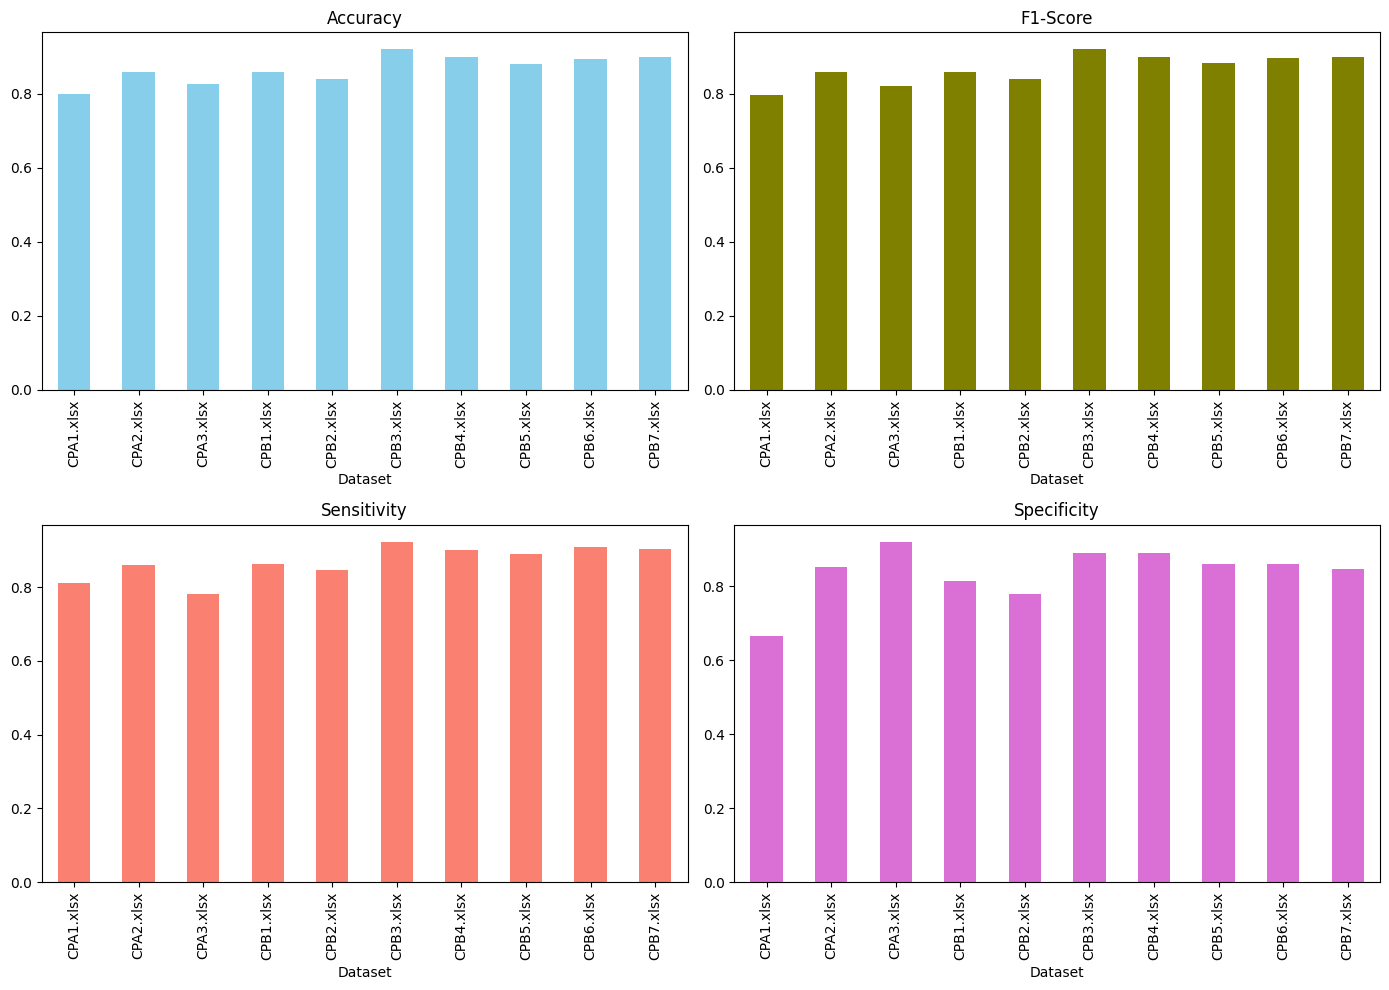

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
import os

# List of dataset paths
dataset_paths = [
    '/content/CPA1.xlsx',
    '/content/CPA2.xlsx',
    '/content/CPA3.xlsx',
    '/content/CPB1.xlsx',
    '/content/CPB2.xlsx',
    '/content/CPB3.xlsx',
    '/content/CPB4.xlsx',
    '/content/CPB5.xlsx',
    '/content/CPB6.xlsx',
    '/content/CPB7.xlsx',
]

# DataFrame to store results
results_df = pd.DataFrame()

# Process each dataset
for file_path in dataset_paths:
    data = pd.read_excel(file_path)
    X = data.drop('kelas', axis=1)
    y = data['kelas']

    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

    # Setup SVM classifier
    svm_model = SVC(random_state=42)
    svm_model.fit(X_train, y_train)

    # Predict on testing data
    predictions = svm_model.predict(X_test)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, predictions)

    # Calculate metrics
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions, average='weighted')
    sensitivity = recall_score(y_test, predictions, average='macro')
    specificity = (cm[0, 0] / (cm[0, 0] + cm[0, 1])) if cm.shape[0] > 1 else float('nan')  # Adjust based on the actual class labels and number of classes

    # Create a DataFrame for this iteration's results
    new_row = pd.DataFrame({
        "Dataset": [file_path.split('/')[-1]],
        "Accuracy": [accuracy],
        "F1-Score": [f1],
        "Sensitivity": [sensitivity],
        "Specificity": [specificity]
    })

    # Append new row to the results DataFrame using pd.concat
    results_df = pd.concat([results_df, new_row], ignore_index=True)

# Display results in a well-formatted DataFrame
print(results_df.to_string(index=False))

# Save results to a CSV file
results_file = '/content/results_3.csv'
results_df.to_csv(results_file, index=False)

# Graph comparison for each metric
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
results_df.set_index('Dataset', inplace=True)
results_df['Accuracy'].plot(kind='bar', ax=axes[0, 0], color='skyblue', title='Accuracy')
results_df['F1-Score'].plot(kind='bar', ax=axes[0, 1], color='olive', title='F1-Score')
results_df['Sensitivity'].plot(kind='bar', ax=axes[1, 0], color='salmon', title='Sensitivity')
results_df['Specificity'].plot(kind='bar', ax=axes[1, 1], color='orchid', title='Specificity')
plt.tight_layout()
plt.show()


  Dataset  Accuracy  F1-Score  Sensitivity  Specificity
CPA1.xlsx  0.760000  0.758846     0.768116     0.666667
CPA2.xlsx  0.840000  0.837898     0.832528     0.925926
CPA3.xlsx  0.813333  0.805889     0.760000     0.920000
CPB1.xlsx  0.860000  0.860169     0.860709     0.851852
CPB2.xlsx  0.840000  0.840256     0.842190     0.814815
CPB3.xlsx  0.880000  0.880000     0.879227     0.888889
CPB4.xlsx  0.900000  0.900120     0.900966     0.888889
CPB5.xlsx  0.893333  0.895062     0.900000     0.880000
CPB6.xlsx  0.893333  0.895643     0.910000     0.860000
CPB7.xlsx  0.900000  0.900000     0.901442     0.865385


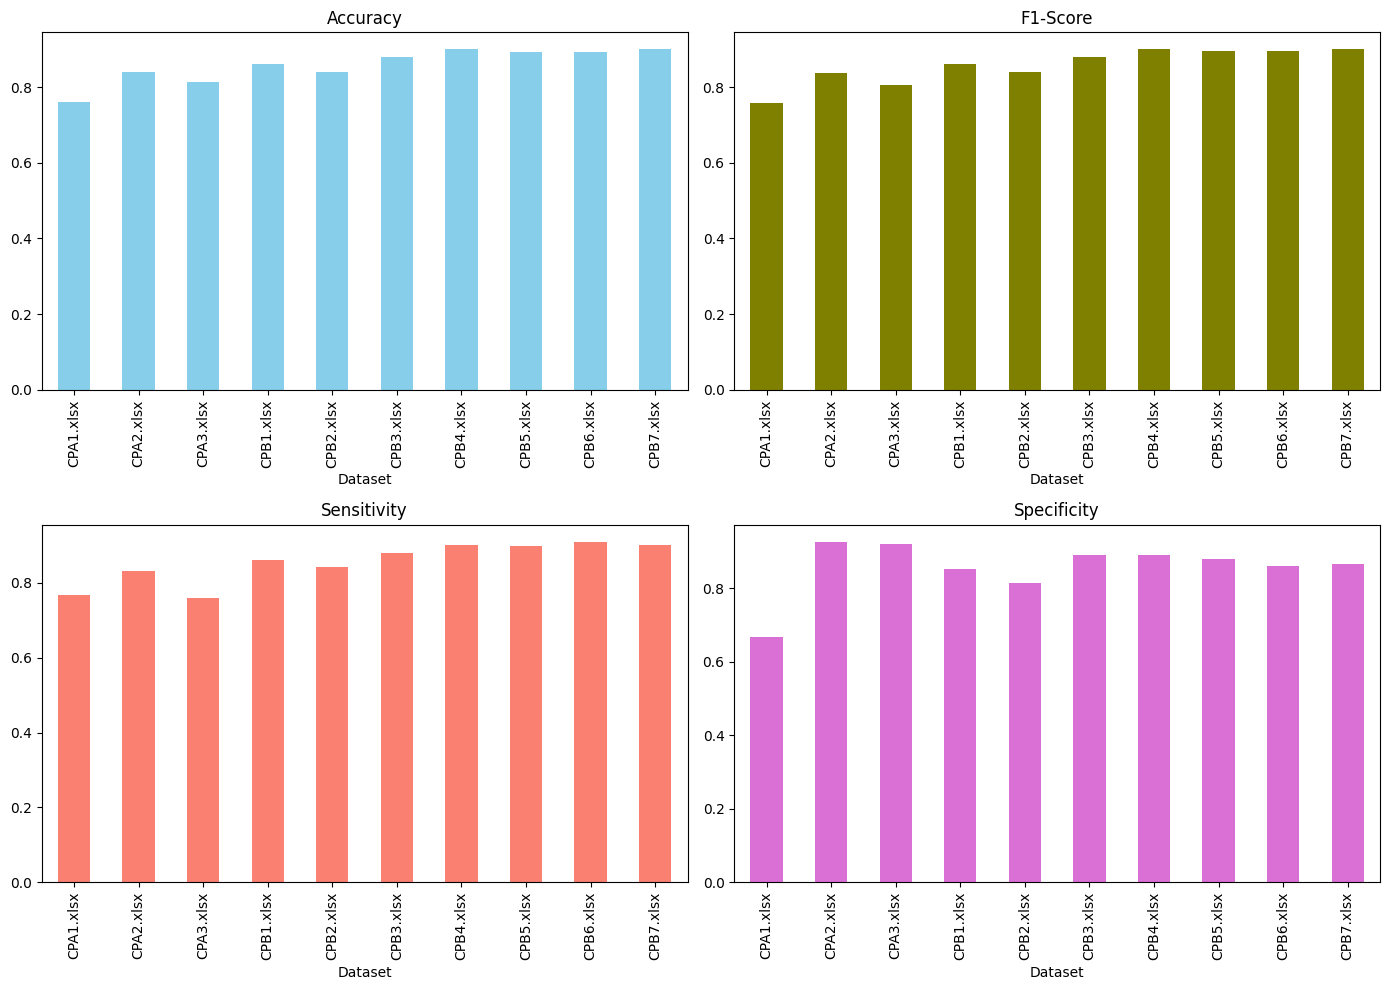

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
import os

# List of dataset paths
dataset_paths = [
    '/content/CPA1.xlsx',
    '/content/CPA2.xlsx',
    '/content/CPA3.xlsx',
    '/content/CPB1.xlsx',
    '/content/CPB2.xlsx',
    '/content/CPB3.xlsx',
    '/content/CPB4.xlsx',
    '/content/CPB5.xlsx',
    '/content/CPB6.xlsx',
    '/content/CPB7.xlsx',
]
# DataFrame to store results
results_df = pd.DataFrame()

# Process each dataset
for file_path in dataset_paths:
    data = pd.read_excel(file_path)
    X = data.drop('kelas', axis=1)
    y = data['kelas']

    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

    # Setup KNN classifier
    knn_model = KNeighborsClassifier()
    knn_model.fit(X_train, y_train)

    # Predict on testing data
    predictions = knn_model.predict(X_test)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, predictions)

    # Calculate metrics
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions, average='weighted')
    sensitivity = recall_score(y_test, predictions, average='macro')
    specificity = (cm[0, 0] / (cm[0, 0] + cm[0, 1])) if cm.shape[0] > 1 else float('nan')

    # Create a DataFrame for the current results
    new_results = pd.DataFrame({
        "Dataset": [file_path.split('/')[-1]],
        "Accuracy": [accuracy],
        "F1-Score": [f1],
        "Sensitivity": [sensitivity],
        "Specificity": [specificity]
    })

    # Append new row to the results DataFrame using pd.concat
    results_df = pd.concat([results_df, new_results], ignore_index=True)

# Display results in a well-formatted DataFrame
print(results_df.to_string(index=False))

# Save results to a CSV file
results_file = '/content/results_4.csv'
results_df.to_csv(results_file, index=False)

# Graph comparison for each metric
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
results_df.set_index('Dataset', inplace=True)
results_df['Accuracy'].plot(kind='bar', ax=axes[0, 0], color='skyblue', title='Accuracy')
results_df['F1-Score'].plot(kind='bar', ax=axes[0, 1], color='olive', title='F1-Score')
results_df['Sensitivity'].plot(kind='bar', ax=axes[1, 0], color='salmon', title='Sensitivity')
results_df['Specificity'].plot(kind='bar', ax=axes[1, 1], color='orchid', title='Specificity')
plt.tight_layout()
plt.show()


**50% training, 25% validation, dan 25% testing**

**Skenario Sebelumnya (75% Training, 25% Testing):**

* **Pembagian Data**:

Data dibagi menjadi dua bagian, yaitu 75% untuk training dan 25% untuk testing. Tidak ada set data yang secara eksplisit dialokasikan untuk validasi.

* **Penggunaan Model**:

Model dilatih langsung pada seluruh set training dan kemudian diuji pada set testing. Tidak ada proses iterasi atau penyesuaian model berdasarkan performa di set validation karena set tersebut tidak ada.

* **Tujuan**:

Fokus utamanya adalah pada pelatihan dan evaluasi langsung model dengan menggunakan data training dan testing.

**Skenario Baru (50% Training, 25% Validation, 25% Testing):**

* **Pembagian Data**:

Data dibagi menjadi tiga bagian. Awalnya, data dibagi menjadi 75% untuk training+validation dan 25% untuk testing. Kemudian, bagian 75% tersebut dibagi lagi menjadi dua, yaitu 50% untuk training dan 25% untuk validation.

* **Penggunaan Model**:

Model dilatih pada set training, dan set validation bisa digunakan untuk mengevaluasi performa model dan melakukan penyesuaian atau fine-tuning parameter model sebelum dilakukan pengujian final pada set testing.

* **Tujuan**:

Menambahkan langkah validasi memberikan kesempatan untuk mengoptimalkan model sebelum pengujian akhir, yang dapat membantu dalam meningkatkan keandalan dan generalisasi model pada data yang tidak terlihat.




  Dataset  Accuracy  F1-Score  Sensitivity  Specificity
CPA1.xlsx  0.800000  0.797424     0.811594     0.666667
CPA2.xlsx  0.860000  0.860169     0.860709     0.851852
CPA3.xlsx  0.840000  0.838235     0.810000     0.900000
CPB1.xlsx  0.860000  0.860168     0.863929     0.814815
CPB2.xlsx  0.820000  0.820216     0.823671     0.777778
CPB3.xlsx  0.920000  0.920128     0.922705     0.888889
CPB4.xlsx  0.900000  0.900120     0.900966     0.888889
CPB5.xlsx  0.893333  0.895643     0.910000     0.860000
CPB6.xlsx  0.906667  0.908885     0.930000     0.860000
CPB7.xlsx  0.900000  0.899880     0.902244     0.846154


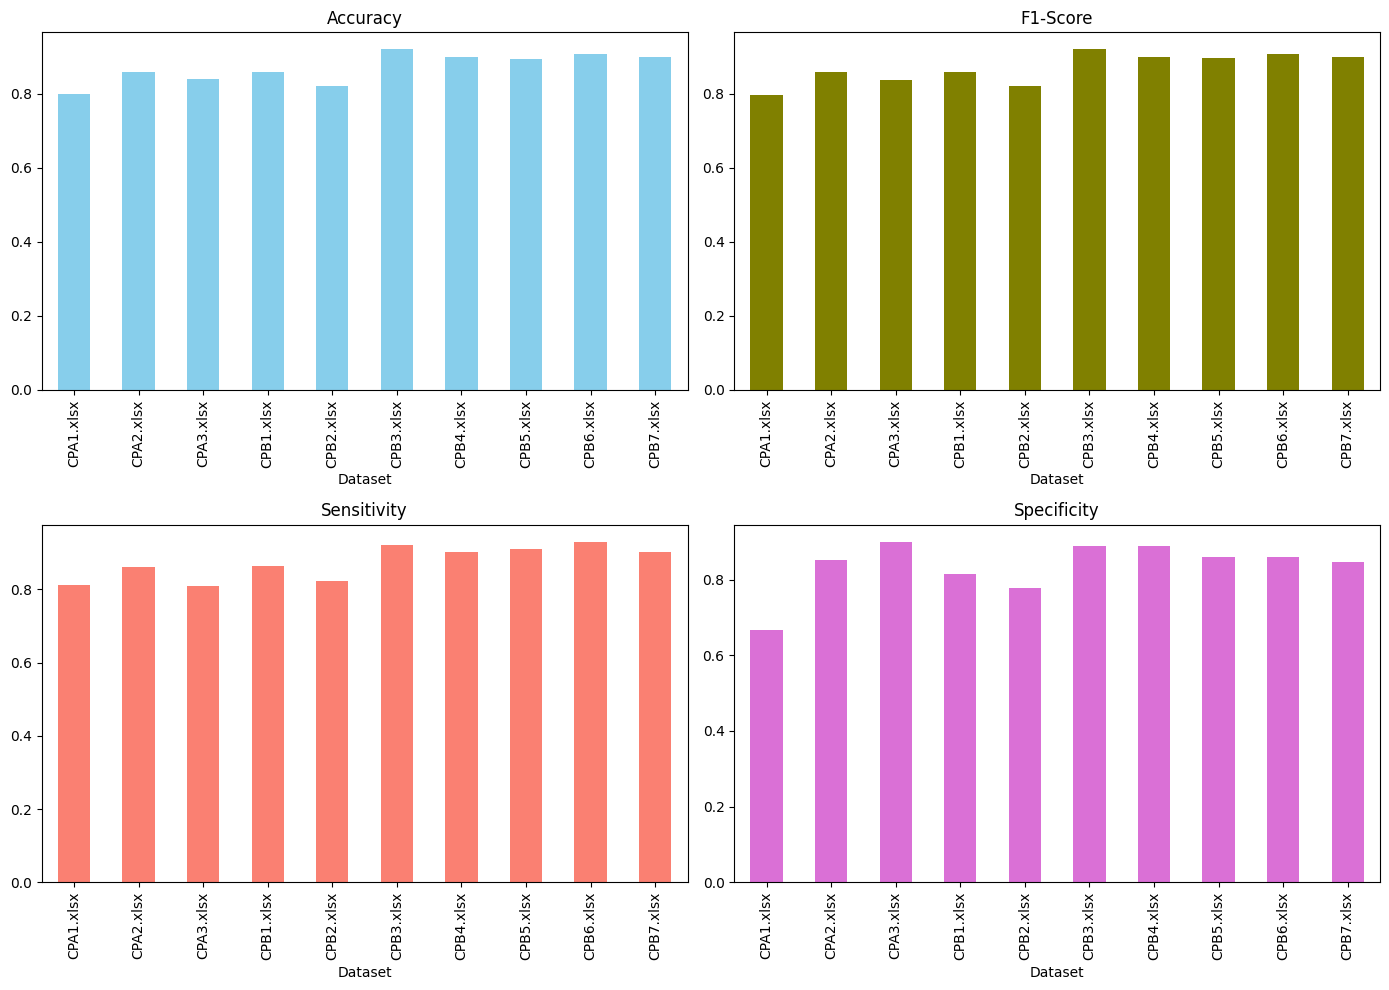

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
import os

# List of dataset paths
dataset_paths = [
    '/content/CPA1.xlsx',
    '/content/CPA2.xlsx',
    '/content/CPA3.xlsx',
    '/content/CPB1.xlsx',
    '/content/CPB2.xlsx',
    '/content/CPB3.xlsx',
    '/content/CPB4.xlsx',
    '/content/CPB5.xlsx',
    '/content/CPB6.xlsx',
    '/content/CPB7.xlsx',
]

# DataFrame to store results
results_df = pd.DataFrame()

# Process each dataset
for file_path in dataset_paths:
    data = pd.read_excel(file_path)
    X = data.drop('kelas', axis=1)
    y = data['kelas']

    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Split data into training+validation and testing sets
    X_train_val, X_test, y_train_val, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

    # Split training+validation set into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=1/3, random_state=42)  # 1/3 of 75% is 25%

    # Setup SVM classifier
    svm_model = SVC(random_state=42)
    svm_model.fit(X_train, y_train)

    # Predict on testing data
    predictions = svm_model.predict(X_test)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, predictions)

    # Calculate metrics
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions, average='weighted')
    sensitivity = recall_score(y_test, predictions, average='macro')
    specificity = (cm[0, 0] / (cm[0, 0] + cm[0, 1])) if cm.shape[0] > 1 else float('nan')

    # Create a DataFrame for this iteration's results
    new_results = pd.DataFrame({
        "Dataset": [file_path.split('/')[-1]],
        "Accuracy": [accuracy],
        "F1-Score": [f1],
        "Sensitivity": [sensitivity],
        "Specificity": [specificity]
    })

    # Append new row to the results DataFrame using pd.concat
    results_df = pd.concat([results_df, new_results], ignore_index=True)

# Display results in a well-formatted DataFrame
print(results_df.to_string(index=False))

# Save results to a CSV file
results_file = '/content/results_5.csv'
results_df.to_csv(results_file, index=False)

# Graph comparison for each metric
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
results_df.set_index('Dataset', inplace=True)
results_df['Accuracy'].plot(kind='bar', ax=axes[0, 0], color='skyblue', title='Accuracy')
results_df['F1-Score'].plot(kind='bar', ax=axes[0, 1], color='olive', title='F1-Score')
results_df['Sensitivity'].plot(kind='bar', ax=axes[1, 0], color='salmon', title='Sensitivity')
results_df['Specificity'].plot(kind='bar', ax=axes[1, 1], color='orchid', title='Specificity')
plt.tight_layout()
plt.show()


  Dataset  Accuracy  F1-Score  Sensitivity  Specificity
CPA1.xlsx  0.760000  0.760000     0.764895     0.703704
CPA2.xlsx  0.820000  0.820216     0.823671     0.777778
CPA3.xlsx  0.800000  0.793651     0.750000     0.900000
CPB1.xlsx  0.840000  0.840000     0.845411     0.777778
CPB2.xlsx  0.840000  0.840000     0.845411     0.777778
CPB3.xlsx  0.920000  0.920128     0.922705     0.888889
CPB4.xlsx  0.900000  0.900120     0.900966     0.888889
CPB5.xlsx  0.880000  0.882297     0.890000     0.860000
CPB6.xlsx  0.893333  0.896052     0.920000     0.840000
CPB7.xlsx  0.880000  0.880000     0.881410     0.846154


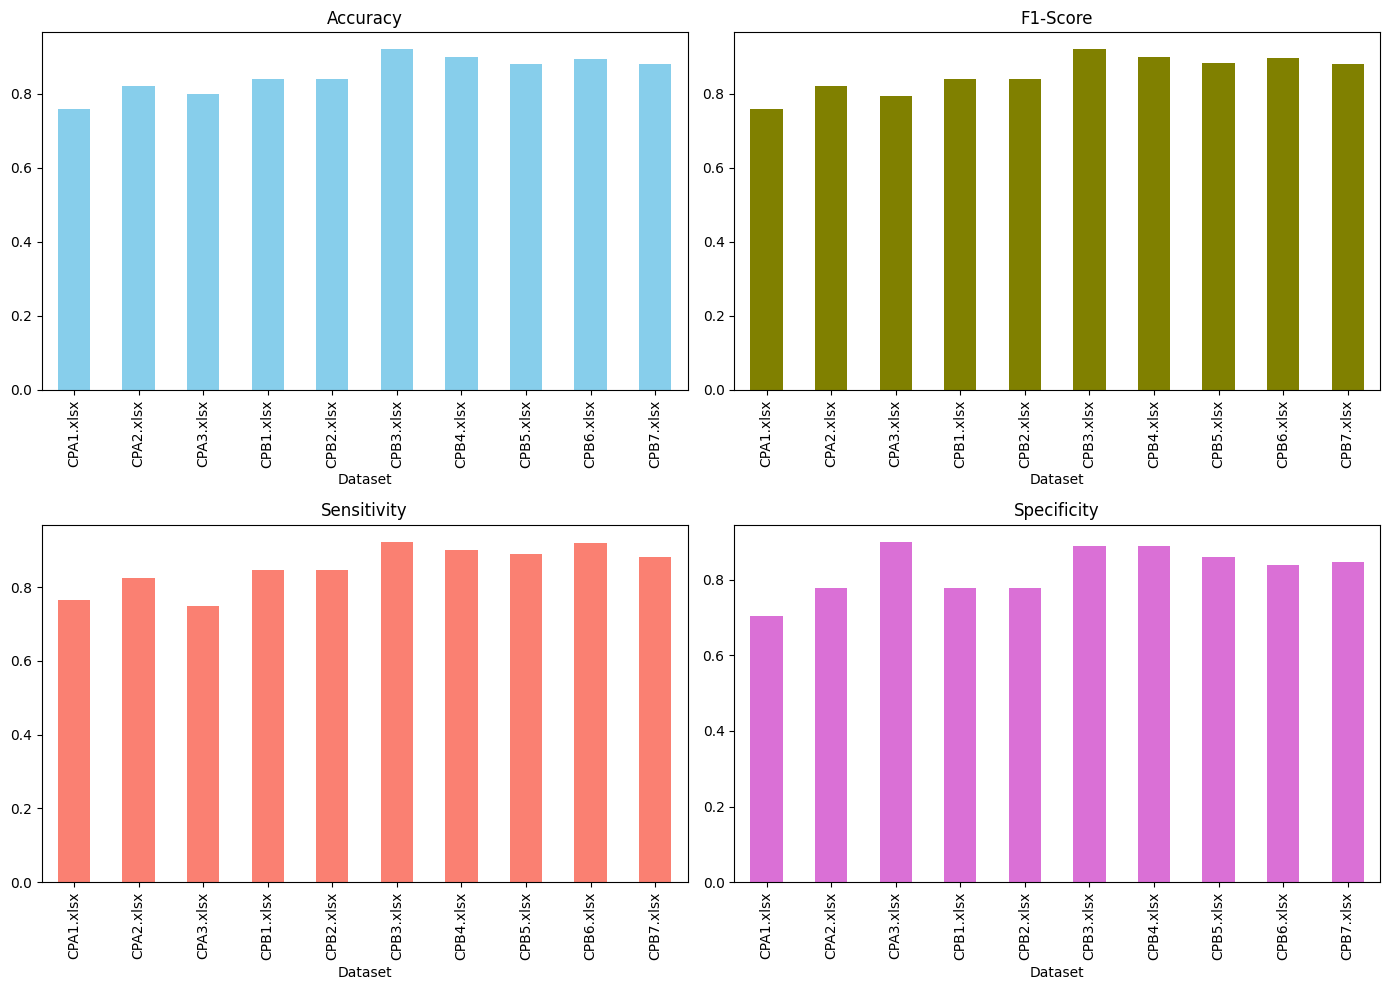

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
import os

# List of dataset paths
dataset_paths = [
    '/content/CPA1.xlsx',
    '/content/CPA2.xlsx',
    '/content/CPA3.xlsx',
    '/content/CPB1.xlsx',
    '/content/CPB2.xlsx',
    '/content/CPB3.xlsx',
    '/content/CPB4.xlsx',
    '/content/CPB5.xlsx',
    '/content/CPB6.xlsx',
    '/content/CPB7.xlsx',
]

# DataFrame to store results
results_df = pd.DataFrame()

# Process each dataset
for file_path in dataset_paths:
    data = pd.read_excel(file_path)
    X = data.drop('kelas', axis=1)
    y = data['kelas']

    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Split data into training+validation and testing sets
    X_train_val, X_test, y_train_val, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

    # Further split training+validation into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.333, random_state=42)  # About 33% of 75% to make it 25% of total

    # Setup KNN classifier
    knn_model = KNeighborsClassifier(n_neighbors=5)  # You can tune this parameter

    # Train model on the training data
    knn_model.fit(X_train, y_train)

    # Optionally, evaluate and tune the model on the validation set
    # Here, we proceed directly to testing

    # Predict on testing data
    predictions = knn_model.predict(X_test)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, predictions)

    # Calculate metrics
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions, average='weighted')
    sensitivity = recall_score(y_test, predictions, average='macro')
    specificity = (cm[0, 0] / (cm[0, 0] + cm[0, 1])) if cm.shape[0] > 1 else float('nan')

    # Create a DataFrame for this iteration's results
    new_results = pd.DataFrame({
        "Dataset": [file_path.split('/')[-1]],
        "Accuracy": [accuracy],
        "F1-Score": [f1],
        "Sensitivity": [sensitivity],
        "Specificity": [specificity]
    })

    # Append new row to the results DataFrame using pd.concat
    results_df = pd.concat([results_df, new_results], ignore_index=True)

# Display results in a well-formatted DataFrame
print(results_df.to_string(index=False))

# Save results to a CSV file
results_file = '/content/results_6.csv'
results_df.to_csv(results_file, index=False)

# Graph comparison for each metric
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
results_df.set_index('Dataset', inplace=True)
results_df['Accuracy'].plot(kind='bar', ax=axes[0, 0], color='skyblue', title='Accuracy')
results_df['F1-Score'].plot(kind='bar', ax=axes[0, 1], color='olive', title='F1-Score')
results_df['Sensitivity'].plot(kind='bar', ax=axes[1, 0], color='salmon', title='Sensitivity')
results_df['Specificity'].plot(kind='bar', ax=axes[1, 1], color='orchid', title='Specificity')
plt.tight_layout()
plt.show()


# Olah Hasil

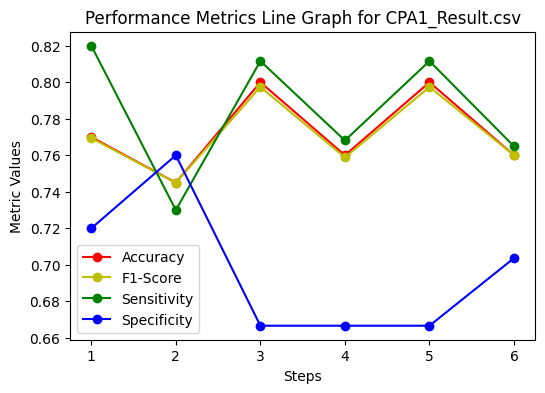

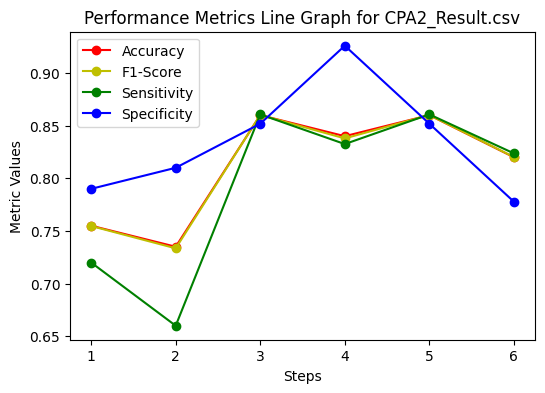

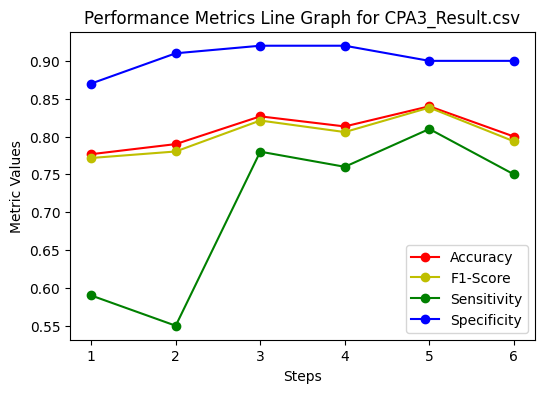

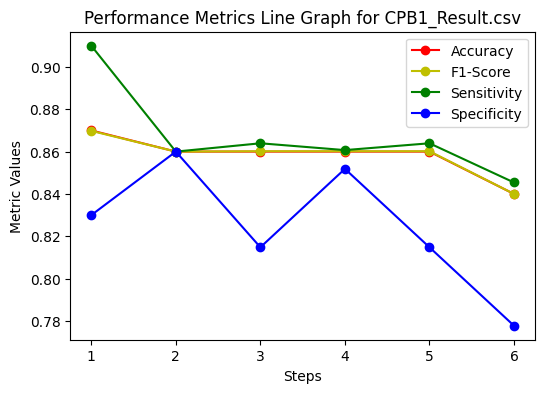

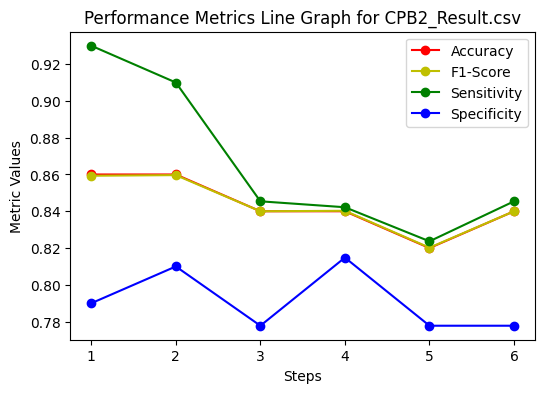

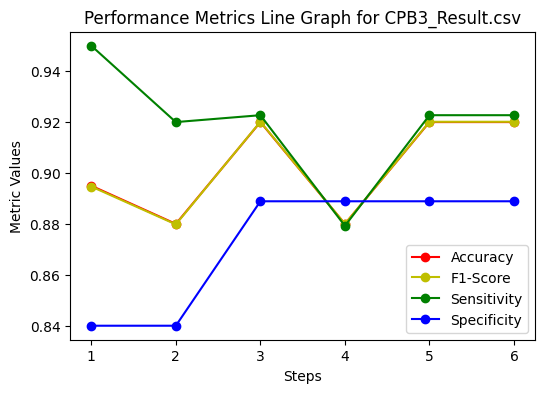

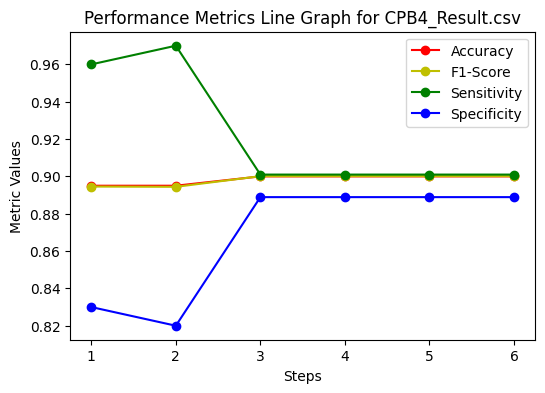

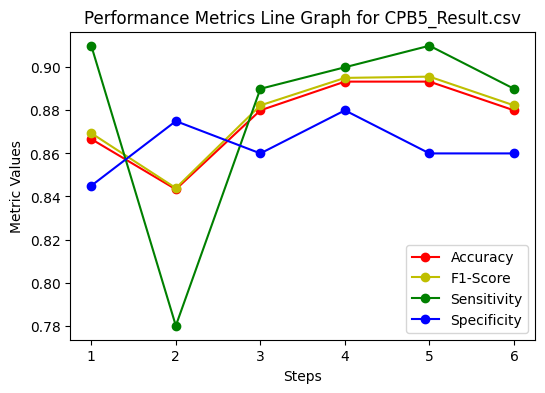

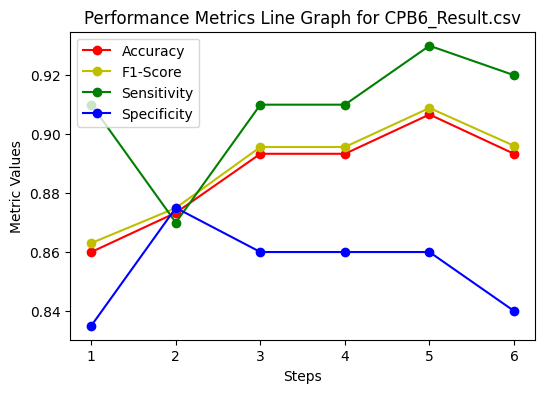

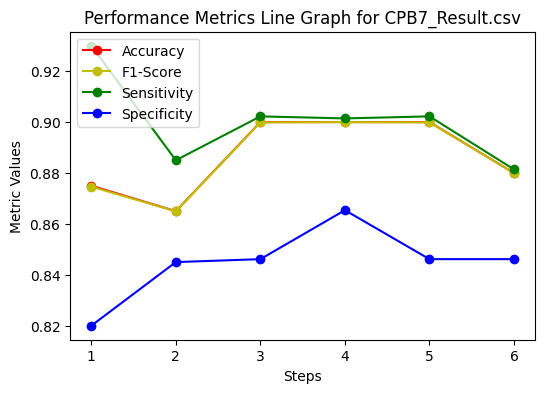

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# List of dataset paths
dataset_paths = [
    '/content/CPA1_Result.csv',
    '/content/CPA2_Result.csv',
    '/content/CPA3_Result.csv',

    '/content/CPB1_Result.csv',
    '/content/CPB2_Result.csv',
    '/content/CPB3_Result.csv',
    '/content/CPB4_Result.csv',
    '/content/CPB5_Result.csv',
    '/content/CPB6_Result.csv',
    '/content/CPB7_Result.csv',
]

# Loop through each dataset and create a plot
for file_path in dataset_paths:
    data = pd.read_csv(file_path)
    steps = data['Step']
    accuracy = data['Accuracy']
    f1_score = data['F1-Score']
    sensitivity = data['Sensitivity']
    specificity = data['Specificity']

    # Create line graphs for each dataset
    plt.figure(figsize=(6, 4))
    plt.plot(steps, accuracy, 'r-o', label='Accuracy')
    plt.plot(steps, f1_score, 'y-o', label='F1-Score')
    plt.plot(steps, sensitivity, 'g-o', label='Sensitivity')
    plt.plot(steps, specificity, 'b-o', label='Specificity')

    plt.xlabel('Steps')
    plt.ylabel('Metric Values')
    plt.title(f'Performance Metrics Line Graph for {file_path.split("/")[-1]}')
    plt.legend()
    plt.show()
